# ***Importing the Libraries***

In [1]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from glob import glob

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential

# ***Importing the Dataset***


In [3]:
#install kaggle
!pip install -q kaggle

In [4]:
 #import the json file containing the token downloaded from kaggle account
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sokainanadi","key":"bf42bc16d1f9f174834988badf07fa65"}'}

In [5]:
#create a kaggle folder
! mkdir ~/.kaggle

In [6]:
# copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [7]:
# permession for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:24<00:00, 120MB/s]
100% 2.70G/2.70G [00:24<00:00, 118MB/s]


In [9]:
# in case it is a zip folder

! unzip new-plant-diseases-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant disea

# **EDA: Analyse Exploratoire de données**

## Create a trianing apple dateset folder

In [10]:
mkdir "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple"


In [11]:
# Folders in the Training Set
folders = glob('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple_*')
folders

['/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot']

In [12]:
mv '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple'

## Create a testing apple dateset folder

In [13]:
mkdir "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple"

In [14]:
mv '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_rot' '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Cedar_apple_rust'  '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple'

In [15]:
# Folders in the Training Set
folders_valid = glob('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple')
folders_valid

['/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple']

## Defining the classes

In [16]:
import pathlib 
train_apple_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple'

train_apple = pathlib.Path(train_apple_path)
class_apple_names = np.array(sorted([item.name for item in train_apple.glob("*")]))
class_apple_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy'], dtype='<U24')

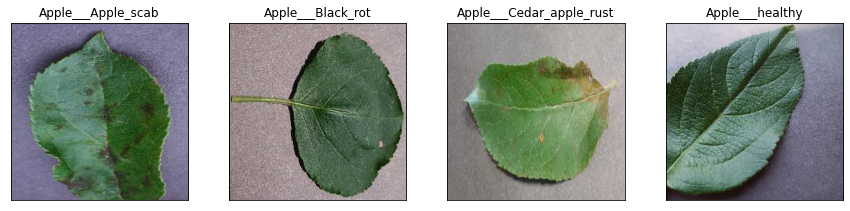

In [17]:
# Create a figure with a grid of subplots
plt.figure(figsize=(15, 15))

# Set a counter to keep track of the subplots
counter = 1

# Iterate through the list of class names
for random_class in class_apple_names:
    # Select a random image from the class directory
    img_path = random.choice(list(train_apple.glob(random_class+"/*.JPG")))
    # Read the image
    img = plt.imread(img_path)
    # Create a subplot
    plt.subplot(4, 4, counter)
    # remove the x and y-axis tick marks
    plt.xticks([])
    plt.yticks([])
    # set the title of the subplot to the class name
    plt.title(random_class)
    # display the image
    plt.imshow(img)
    # increment the counter
    counter += 1
    # if the counter is greater than 16, break the loop
    if counter > 16:
        break
plt.show()


In [18]:
number_classes = {'Apple_Scrab': len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple/Apple___Apple_scab")),
'Black_rot': len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple/Apple___Black_rot")),
'Cedar_Apple_Rust': len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple/Apple___Cedar_apple_rust")),
'Healthy': len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple/Apple___healthy"))}

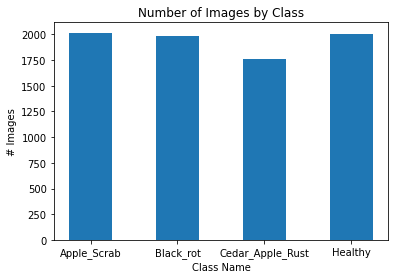

In [19]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

# **Création des modèles ML**

## Inception_V3

In [20]:
# Import the InceptionV3 model and here we will be using imagenet weights
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 1s 0us/step


In [21]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [22]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [23]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [24]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Training Generator
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_apple',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7771 images belonging to 4 classes.


In [27]:
# Testing Generator
test_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1943 images belonging to 4 classes.


In [28]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-28-b74ac03c6e6a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/3
243/243 [==============================] - 111s 403ms/step - loss: 1.2065 - accuracy: 0.8584 - val_loss: 0.5513 - val_accuracy: 0.9177
Epoch 2/3
243/243 [==============================] - 95s 392ms/step - loss: 0.2996 - accuracy: 0.9480 - val_loss: 0.2464 - val_accuracy: 0.9588
Epoch 3/3
243/243 [==============================] - 94s 385ms/step - loss: 0.3007 - accuracy: 0.9546 - val_loss: 0.3464 - val_accuracy: 0.9542


In [29]:
import pandas as pd

# Extract the accuracy values
accuracy_values = r.history['accuracy'][2]
loss = r.history['loss'][2]

loss


0.30070775747299194

In [30]:
# Create a dataframe
df = pd.DataFrame({'Model name':'Inception model','Accuracy': [accuracy_values],'loss':[loss]})


# Display the dataframe
df

,Model name,Accuracy,loss
0,Inception model,0.954575,0.300708


### Visualize the model training by plotting Loss Function and Accuracy

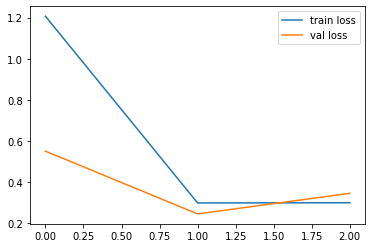

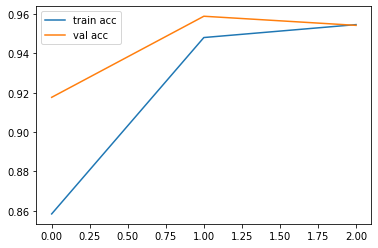

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [33]:
y_pred = model.predict(test_set)
y_pred

61/61 [==============================] - 6s 85ms/step


array([[1.23458057e-23, 1.00000000e+00, 3.69170726e-27, 1.24112559e-30],
       [7.47068965e-13, 9.99942780e-01, 4.98722475e-05, 7.30685042e-06],
       [4.13304200e-08, 1.51144083e-22, 1.00000000e+00, 1.03431146e-10],
       ...,
       [1.56836396e-34, 3.33777330e-36, 1.00000000e+00, 0.00000000e+00],
       [5.75659752e-01, 1.02279592e-17, 5.16007939e-17, 4.24340248e-01],
       [1.08247022e-09, 1.00000000e+00, 1.16407106e-09, 9.19242188e-16]],
      dtype=float32)

In [34]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 2, ..., 2, 0, 1])

## model VGG 

In [37]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

# Charger le modèle VGG16 pré-entraîné (sans les couches de sortie)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congeler les couches du modèle pour éviter l'overfitting
for layer in vgg.layers:
    layer.trainable = False
    
# Ajouter des couches de sortie pour adapter le modèle à votre tâche de classification
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictionsVGG = Dense(len(folders), activation='softmax')(x)

# Créer un nouveau modèle en combinant les couches précédentes
model = Model(inputs=vgg.input, outputs=predictionsVGG)

# Compiler le modèle
r2=model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Entraîner le modèle avec les données d'entraînement et de validation
r2=model.fit_generator(training_set, validation_data=test_set, epochs=3)

# Sauvegarder le modèle en utilisant la méthode save()
model.save('model_vgg.h5')


58889256/58889256 [==============================] - 0s 0us/step


<ipython-input-37-4851017280e0>:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r2=model.fit_generator(training_set, validation_data=test_set, epochs=3)


Epoch 1/3
243/243 [==============================] - 111s 442ms/step - loss: 0.5347 - accuracy: 0.7851 - val_loss: 0.2425 - val_accuracy: 0.9048
Epoch 2/3
243/243 [==============================] - 105s 431ms/step - loss: 0.2519 - accuracy: 0.9081 - val_loss: 0.1591 - val_accuracy: 0.9439
Epoch 3/3
243/243 [==============================] - 103s 424ms/step - loss: 0.2146 - accuracy: 0.9166 - val_loss: 0.2151 - val_accuracy: 0.9146


### Visualisation Loss et accuracy du model VGG 

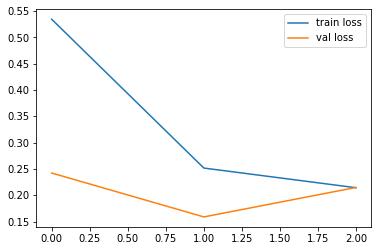

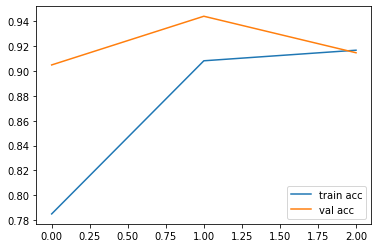

<Figure size 432x288 with 0 Axes>

In [38]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

##ResNet50

In [41]:
from keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

# Charger le modèle ResNet50 pré-entraîné (sans les couches de sortie)
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congeler les couches du modèle pour éviter l'overfitting
for layer in resnet.layers:
    layer.trainable = False
    
# Ajouter des couches de sortie pour adapter le modèle à votre tâche de classification
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)

# Créerun nouveau modèle en combinant les couches précédentes
model = Model(inputs=resnet.input, outputs=predictions)

#Compiler le modèle
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Entraîner le modèle avec les données d'entraînement et de validation
r3=model.fit_generator(training_set, validation_data=test_set, epochs=3)

#Sauvegarder le modèle en utilisant la méthode save()
model.save('model_resnet.h5')


94765736/94765736 [==============================] - 1s 0us/step


<ipython-input-41-cb23d4f00811>:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r3=model.fit_generator(training_set, validation_data=test_set, epochs=3)


Epoch 1/3
243/243 [==============================] - 104s 411ms/step - loss: 1.2814 - accuracy: 0.4075 - val_loss: 1.0617 - val_accuracy: 0.5615
Epoch 2/3
243/243 [==============================] - 100s 413ms/step - loss: 1.0785 - accuracy: 0.5114 - val_loss: 0.9232 - val_accuracy: 0.6186
Epoch 3/3
243/243 [==============================] - 99s 409ms/step - loss: 0.9792 - accuracy: 0.5611 - val_loss: 0.9479 - val_accuracy: 0.5924


### Visualisation Loss et accuracy du model ResNet50 

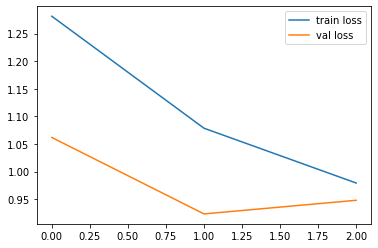

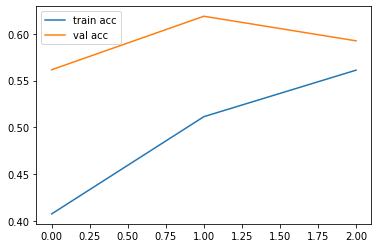

<Figure size 432x288 with 0 Axes>

In [42]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r3.history['loss'], label='train loss')
plt.plot(r3.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(r3.history['accuracy'], label='train acc')
plt.plot(r3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# ***Comparaison des modèles***

In [48]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import load_model
# Charger les modèles entraînés

model_inception = load_model('model_inception.h5')
model_resnet= load_model('model_resnet.h5')
model_vgg = load_model('model_vgg.h5')

# Prédire les classes des éléments de test pour chaque modèle

y_pred_inception = model_inception.predict_generator(test_set)
y_pred_resnet = model_resnet.predict_generator(test_set)
y_pred_vgg = model_vgg.predict_generator(test_set)

# Transformer les prédictions en classes

y_pred_inception = np.argmax(y_pred_inception, axis=1)
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)
y_pred_vgg = np.argmax(y_pred_vgg, axis=1)

# Calculer les métriques pour chaque modèle

accuracy_values_inception = r.history['accuracy'][2]
loss_inception = r.history['loss'][2]
f1_inception = f1_score(test_set.classes, y_pred_inception, average='weighted')
precision_inception = precision_score(test_set.classes, y_pred_inception, average='weighted')

#VGG MODEL
accuracy_values_VGG = r2.history['accuracy'][2]
loss_VGG= r2.history['loss'][2]
f1_VGG = f1_score(test_set.classes, y_pred_vgg, average='weighted')
precision_VGG = precision_score(test_set.classes, y_pred_vgg, average='weighted')

#RESNET50
accuracy_values_RESNET50 = r3.history['accuracy'][2]
loss_RESNET50 = r3.history['loss'][2]
f1_resnet= f1_score(test_set.classes, y_pred_resnet, average='weighted')
precision_resnet = precision_score(test_set.classes, y_pred_resnet, average='weighted')





<ipython-input-48-02481660eebe>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_inception = model_inception.predict_generator(test_set)
<ipython-input-48-02481660eebe>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_resnet = model_resnet.predict_generator(test_set)
<ipython-input-48-02481660eebe>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_vgg = model_vgg.predict_generator(test_set)


In [50]:
# Create a dataframe
df = pd.DataFrame({'Model name':['InceptionV3','VGG16','ResNet50'],
                  'Accuracy': [accuracy_values_inception, accuracy_values_VGG, accuracy_values_RESNET50],
                  'loss':[loss_inception, loss_VGG, loss_RESNET50],
                   'f1_score':[f1_inception,f1_VGG,f1_resnet],
                   'precision':[precision_inception,precision_VGG,precision_resnet]})


# Display the dataframe
df

,Model name,Accuracy,loss,f1_score,precision
0,InceptionV3,0.954575,0.300708,0.254632,0.255081
1,VGG16,0.916613,0.214563,0.261287,0.264155
2,ResNet50,0.561060,0.979204,0.204187,0.259021


In [ ]:
#le modèle VGG serait considéré comme le plus approprié en se basant sur les métriques de p
#erformance données.
# Il a la plus haute précision et la plus faible perte, ce qui indique qu'il est le modèle le plus précis 
#et le meilleur pour minimiser les erreurs. Le score F1 est également relativement élevé, ce qui suggère
# qu'il a un bon équilibre entre la précision et la rappel. Il pourrait être intéressant de tester tous
# les modèles sur la tâche à laquelle ils sont destinés pour voir lequel se comporte mieux.

### Création d'un systeme predectif pour Inception V3

In [51]:
# Model saved with Keras model.save()
MODEL_PATH ='/content/model_vgg.h5'

# Load your trained model
model = load_model(MODEL_PATH)

img_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG'
img_path2 = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_apple/Apple___Black_rot/6941b868-48df-4f58-9b34-4bc9d9e82867___JR_FrgE.S 8668_new30degFlipLR.JPG'
img = image.load_img(img_path2, target_size=(224, 224))

# Preprocessing the image
x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
x=x/255
x = np.expand_dims(x, axis=0)

In [52]:
y_pred = model.predict(x)
y_pred=np.argmax(y_pred, axis=1)
if y_pred==0:
    y_pred="Apple_scab"
elif y_pred==1:
    y_pred="Black_rot"
elif y_pred==2:
    y_pred="cedar_apple_rust"
elif y_pred==3:
    y_pred="healthy"
y_pred


1/1 [==============================] - 0s 135ms/step


'Black_rot'